In [60]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import genextreme as gev

** Project 2 Part 1 **

This first section includes code and explanations for solution to exercise 12.2 d.):

In [3]:
#Data loading 

df = pd.read_csv("https://web.stanford.edu/~xing/statfinbook/_BookData/Chap12/intel_d_logret.txt", sep = '\t', header = None)


#Data preprocessing

df.columns = ['date', 'return']
df['date'] = pd.to_datetime(df['date'])
df['sample_period'] = np.nan

for i in range(len(df)):
    df['sample_period'][i] = (df['date'][i]-df['date'][0]).days//20

df.head()

/Users/Adi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,date,return,sample_period
0,1986-07-10,-0.024692,0.0
1,1986-07-11,-0.105360,0.0
2,1986-07-14,0.000000,0.0
3,1986-07-15,0.000000,0.0
4,1986-07-16,-0.028171,0.0


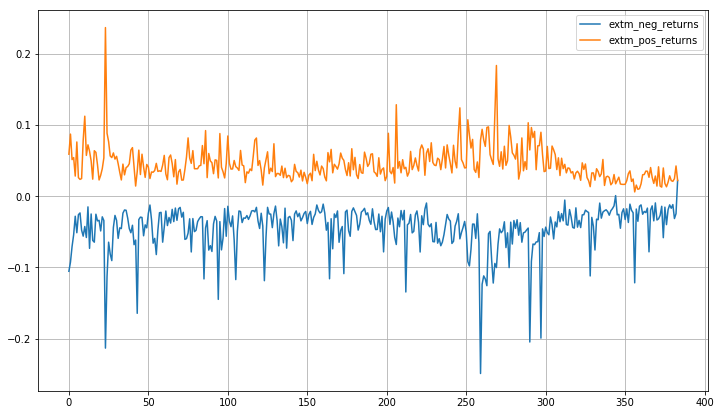

In [91]:
max_periods = df['sample_period'].max()
indx = np.arange(max_periods + 1)

#set to new data frame
df_2 = pd.DataFrame(index = indx, columns = ['extm_neg_returns', 'extm_pos_returns'])

#loop through each sub_sample and calculate corresponding minimum return 
data = {}

for i in range(len(df)):
    if(not np.isnan(df['sample_period'][i])):
        period = df['sample_period'][i]
        if(not period in data.keys()):
            data[period] = [df['return'][i]]
        else:
            data[period].append(df['return'][i])

for i in range(len(df_2)):
    df_2['extm_neg_returns'][i] = min(data[i])
    df_2['extm_pos_returns'][i] = max(data[i])

df_2[['extm_neg_returns','extm_pos_returns']].plot(grid = True, figsize = (12,7))

In [90]:
#Use scipy.stats to fit series of the extremely negative returns to GEV distribution

c = -0.1 #initializing shape parameter
mod = gev.fit(list(df_2['extm_neg_returns']), c)

print("Shape Parameter:%.2f" % -mod[0])
print("Location Parameter:%.2f" % mod[1])
print("Scale Parameter:%.2f" % mod[2])

Shape Parameter:-0.46
Location Parameter:-0.05
Scale Parameter:0.03


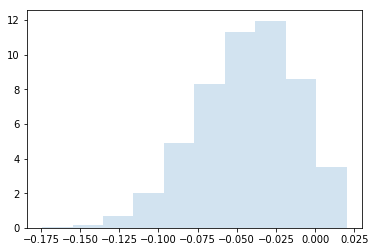

In [88]:
#Graph of fitted GEV distribution from estimated parameters
fig, ax = plt.subplots(1, 1)
r = gev.rvs(c = mod[0], loc = mod[1], scale = mod[2], size=2000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

In [92]:
#We repeat the above process for the extremely positive returns in order to manage risks of short positions

c = -0.1 #initializing shape parameter
mod = gev.fit(list(df_2['extm_pos_returns']), c)

print("Shape Parameter:%.2f" % -mod[0])
print("Location Parameter:%.2f" % mod[1])
print("Scale Parameter:%.2f" % mod[2])

Shape Parameter:0.09
Location Parameter:0.03
Scale Parameter:0.02


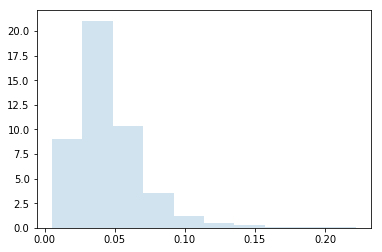

In [93]:
#Graph of fitted GEV distribution from estimated parameters
fig, ax = plt.subplots(1, 1)
r = gev.rvs(c = mod[0], loc = mod[1], scale = mod[2], size=2000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

** Project 2 Part 2:**

The following section contains a summary of the attached paper on risk management in connection with the risk management chapter in the textbook:

The entire purpose of the paper is to extend the ideas of value-at-risk (VaR) estimations and quantile regression in order to develop new risk measures. Additionally, the paper utilizes real data along with Fama-French models to empirically validate the efficacy of these newly proposed risk measures. Essentially, quantile regression provides a robust method of directly modeling the quantiles of a distribution. Contrast this with the standard approach of first estimating the distribution and then calculating the desired quantiles (VaRs), an algorithm that is more prone to be sensitive to heteoskedasticity and auto-correlations exhibited in the data. 

Expanding on the previous points further, the risk measures surveyed are done in a quantile regression credibility framework (used in actuarial science). Starting with the fundamentals as explained in chapter 2 of the textbook, the author outlines quantile regression and VaR calculations. From there, the author builds on these basic risk measures by introducing conditionality as in the first modified measure called (regression) conditional tail expectation (CTE). This is a similar measure to VaR except conditioned only on losses larger than a given VaR. This is perhaps more useful than the rudimentary risk measurements but only by providing information on the average of the tail. Hence, extremely severe losses occuring at low-frequencies are unaccounted for.  

The author takes things further by next considering (regression) conditional tail median or CrRTCM. This tends to be more robust than the previous measurement as it is less sensitive to the tail behavior inherent in the distribution. However, this does not provide a lot of detail regarding the actual behavior of the underlying tail-end of the distribution. Thus, the next measure called credible quantile regression tail expectation (CrQRTE), which takes into consideration temporal dynamics of the the distribution's tail and provides an analogous measurement ot CTE except using quantile regression. 

Finally, the remainder of the paper discusses empirical parameter estimation approaches for calculating CrQRTE and then illustrating its relative superiority to the other risk measurements mentioned via an application to a Fama-French portfolio. As expected, the CrQRTE was undisputedly the best and provided satistifactory results whereas the other metrics including CTE and CrRTCM suffered from the presence of outliers in the data and did not hold up. To close, the author strongly suggests that the CrQRTE should be the standard of risk-measurement in the finance and insurance industries as opposed to VaR. 